In [10]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
model = joblib.load('best_model.joblib')

In [3]:
data = pd.read_csv('data.csv')

specific_columns = ['SFH', 'Request_URL', 'having_IP_Address', 'SSLfinal_State', 'web_traffic', 
                    'URL_Length', 'URL_of_Anchor', 'popUpWindow', 'Result'] 
df = data[specific_columns]

df.head()

,SFH,Request_URL,having_IP_Address,SSLfinal_State,web_traffic,URL_Length,URL_of_Anchor,popUpWindow,Result
0,1,-1,0,1,1,1,-1,-1,0
1,-1,-1,1,-1,0,1,-1,-1,1
2,1,0,0,0,0,-1,-1,-1,1
3,1,-1,0,1,0,1,-1,0,0
4,-1,-1,0,1,0,-1,0,-1,1


In [4]:
# Load pre-trained model
model = DecisionTreeClassifier()

# Assuming your new dataset has features X and target variable y
X_new = data.drop(columns=['Result'])
y_new = data['Result']

# Preprocess your new data if needed
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Fit the model to your training data
model.fit(X_new_scaled, y_new)

# Apply the model to the new data
predictions = model.predict(X_new_scaled)

# Now 'predictions' contains the predicted values for the new dataset.
# Apply the model to the new data
predictions = model.predict(X_new_scaled)

# Now 'predictions' contains the predicted values for the new dataset.
print("Predictions:")
print(predictions)

Predictions:
[ 0  1  1 ...  1  1 -1]


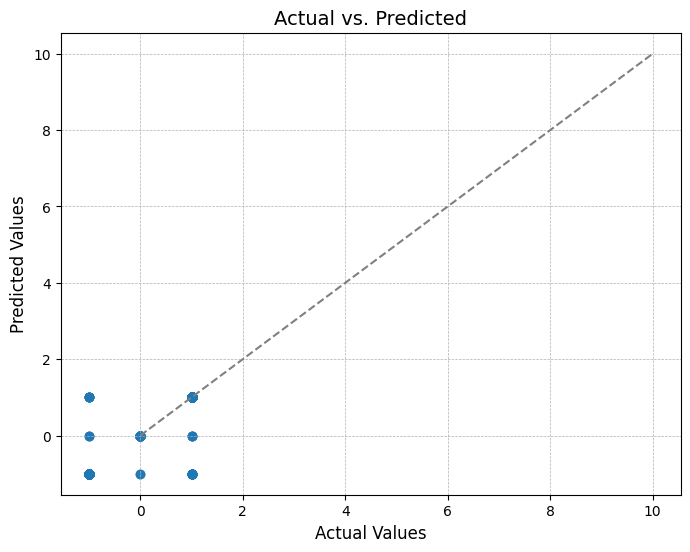

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(y_new, predictions, alpha=0.7)

plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs. Predicted", fontsize=14)

plt.grid(True, linestyle='--', linewidth=0.5)

# Add a diagonal line for reference (y = x)
plt.plot([0, 10], [0, 10], color='gray', linestyle='--')

In [25]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_new, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[689   4   9]
 [  3 100   0]
 [ 32   6 510]]
